In [37]:
import glob

from natsort import natsorted
import numpy as np
import pandas as pd
import seaborn as sns
from westminster.stats import jointplot, stat_tests

%matplotlib inline
sns.set(font_scale=1.25, style='ticks')

In [38]:
label1 = 'mean'
out1 = 'models_mean'

label2 = 'sum'
out2 = 'models_sum'

## Helpers

In [39]:
head_i = None
if head_i is None:
    eval_str = "eval"
else:
    eval_str = f"eval{head_i}"

In [40]:
def read_metrics(acc_glob_str, metric="pearsonr"):
    rep_cors = []
    acc_files = natsorted(glob.glob(acc_glob_str))
    for acc_file in acc_files:
        acc_df = pd.read_csv(acc_file, sep="\t", index_col=0)
        rep_cors.append(acc_df.loc[:, metric].mean())

    cors_mean = np.mean(rep_cors)
    cors_stdm = np.std(rep_cors) / np.sqrt(len(rep_cors))

    return rep_cors, cors_mean, cors_stdm

## Training set


Train (3 reps):
mean       0.8200 (0.0004)
sum        0.7914 (0.0015)
Mann-Whitney U p-value: 0.25
T-test p-value: 0.00512


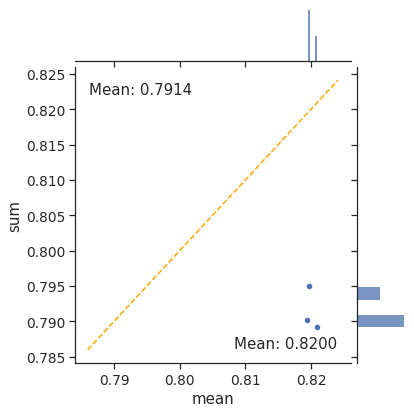

In [43]:
glob1_str = f"{out1}/*/{eval_str}_train/acc.txt"
metrics1_rep, metrics1_mean, metrics1_stdm = read_metrics(glob1_str)

glob2_str = f"{out2}/*/{eval_str}_train/acc.txt"
metrics2_rep, metrics2_mean, metrics2_stdm = read_metrics(glob2_str)

mwp, tp = stat_tests(metrics1_rep, metrics2_rep, "two-sided")
print(f"\nTrain (%d reps):" % len(metrics1_rep))
print(f"{label1:10s} {metrics1_mean:.4f} ({metrics1_stdm:.4f})")
print(f"{label2:10s} {metrics2_mean:.4f} ({metrics2_stdm:.4f})")
print("Mann-Whitney U p-value: %.3g" % mwp)
print("T-test p-value: %.3g" % tp)

jointplot(metrics1_rep, metrics2_rep, label1, label2)

## Test set


Test (3 reps):
mean       0.6450 (0.0101)
sum        0.6539 (0.0089)
Mann-Whitney U p-value: 0.25
T-test p-value: 0.027


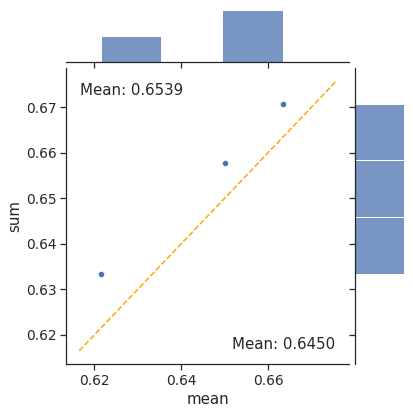

In [44]:
glob1_str = f"{out1}/*/{eval_str}/acc.txt"
metrics1_rep, metrics1_mean, metrics1_stdm = read_metrics(glob1_str)

glob2_str = f"{out2}/*/{eval_str}/acc.txt"
metrics2_rep, metrics2_mean, metrics2_stdm = read_metrics(glob2_str)

mwp, tp = stat_tests(metrics1_rep, metrics2_rep, "two-sided")
print(f"\nTest (%d reps):" % len(metrics1_rep))
print(f"{label1:10s} {metrics1_mean:.4f} ({metrics1_stdm:.4f})")
print(f"{label2:10s} {metrics2_mean:.4f} ({metrics2_stdm:.4f})")
print("Mann-Whitney U p-value: %.3g" % mwp)
print("T-test p-value: %.3g" % tp)

jointplot(metrics1_rep, metrics2_rep, label1, label2)

## Specificity


Specificity (3 reps):
mean       0.4241 (0.0056)
sum        0.4300 (0.0057)
Mann-Whitney U p-value: 0.25
T-test p-value: 0.0457


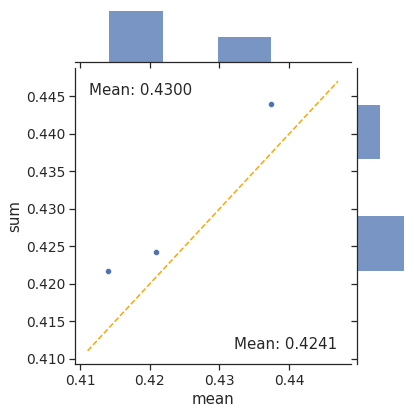

In [45]:
glob1_str = f"{out1}/*/{eval_str}_spec/acc.txt"
metrics1_rep, metrics1_mean, metrics1_stdm = read_metrics(glob1_str)

glob2_str = f"{out2}/*/{eval_str}_spec/acc.txt"
metrics2_rep, metrics2_mean, metrics2_stdm = read_metrics(glob2_str)

mwp, tp = stat_tests(metrics1_rep, metrics2_rep, "two-sided")
print(f"\nSpecificity (%d reps):" % len(metrics1_rep))
print(f"{label1:10s} {metrics1_mean:.4f} ({metrics1_stdm:.4f})")
print(f"{label2:10s} {metrics2_mean:.4f} ({metrics2_stdm:.4f})")
print("Mann-Whitney U p-value: %.3g" % mwp)
print("T-test p-value: %.3g" % tp)

jointplot(metrics1_rep, metrics2_rep, label1, label2)